<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data import



In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [3]:
# metadata
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [4]:
# variable information
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
y['income'] = y['income'].replace({
    '>50K.': 1,
    '<=50K.': 0,
    '>50K': 1,
    '<=50K': 0
}).astype(np.int8)

<ipython-input-5-917d92965a37>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['income'] = y['income'].replace({
<ipython-input-5-917d92965a37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({


#EDA

In [6]:
edu = pd.concat([X['education'], X['education-num']], axis=1)
edu.groupby('education').mean()

,education-num
education,
10th,6.0
11th,7.0
12th,8.0
1st-4th,2.0
5th-6th,3.0
7th-8th,4.0
9th,5.0
Assoc-acdm,12.0
Assoc-voc,11.0


In [7]:
Data=pd.concat([X, y], axis=1)

In [8]:
Data.drop_duplicates(inplace=True)

In [9]:
# Data.dropna(inplace=True)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48794 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48794 non-null  int64 
 1   workclass       47831 non-null  object
 2   fnlwgt          48794 non-null  int64 
 3   education       48794 non-null  object
 4   education-num   48794 non-null  int64 
 5   marital-status  48794 non-null  object
 6   occupation      47828 non-null  object
 7   relationship    48794 non-null  object
 8   race            48794 non-null  object
 9   sex             48794 non-null  object
 10  capital-gain    48794 non-null  int64 
 11  capital-loss    48794 non-null  int64 
 12  hours-per-week  48794 non-null  int64 
 13  native-country  48520 non-null  object
 14  income          48794 non-null  int8  
dtypes: int64(6), int8(1), object(8)
memory usage: 5.6+ MB


In [11]:
Data.shape

(48794, 15)

In [12]:
Data.isna().sum().sum()

2203

In [13]:
Data.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [14]:
Data.fillna(method='bfill')

<ipython-input-14-9e4c8833b58a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data.fillna(method='bfill')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [15]:
Data.ffill(inplace=True)

In [16]:
Data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [17]:
Data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [18]:
# Find columns with '?' values
columns_with_question_marks = Data.columns[Data.isin(['?']).any()]

# Display rows containing '?' in those columns
rows_with_question_marks = Data[Data[columns_with_question_marks].isin(['?']).any(axis=1)]

rows_with_question_marks

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [19]:
columns_with_question_marks = Data.columns[(Data == '?').any()]

In [20]:
columns_with_question_marks

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [21]:
rows_without_question_marks = Data[~Data[columns_with_question_marks].isin(['?']).any(axis=1)]
rows_without_question_marks

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [22]:
rows_without_question_marks['capital-loss'].value_counts()

,count
capital-loss,
0,44206
1902,296
1977,247
1887,229
2415,68
...,...
1539,1
4356,1
2080,1


In [23]:
Data = rows_without_question_marks.drop(columns=['fnlwgt', 'education', 'capital-gain', 'capital-loss'])

#Data preprocessing

In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
ohe = OneHotEncoder(sparse_output=False, drop='first', dtype=np.int8)
scaler = StandardScaler()

ct = ColumnTransformer([
    ('o_enc', ohe, ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']),
    ('standard', scaler, ['age', 'hours-per-week', 'education-num'])
], remainder='passthrough').set_output(transform='pandas')

pre_1 = ct.fit_transform(Data)
pre_1

,o_enc__workclass_Local-gov,o_enc__workclass_Never-worked,o_enc__workclass_Private,o_enc__workclass_Self-emp-inc,o_enc__workclass_Self-emp-not-inc,o_enc__workclass_State-gov,o_enc__workclass_Without-pay,o_enc__marital-status_Married-AF-spouse,o_enc__marital-status_Married-civ-spouse,o_enc__marital-status_Married-spouse-absent,...,o_enc__native-country_Taiwan,o_enc__native-country_Thailand,o_enc__native-country_Trinadad&Tobago,o_enc__native-country_United-States,o_enc__native-country_Vietnam,o_enc__native-country_Yugoslavia,standard__age,standard__hours-per-week,standard__education-num,remainder__income
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0.032757,-0.061386,1.132962,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0.854397,-2.281733,1.132962,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-0.041937,-0.061386,-0.432530,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1.078480,-0.061386,-1.215275,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-0.788882,-0.061386,1.132962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.032757,-0.390326,1.132962,0
48838,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.900120,-0.061386,-0.432530,0
48839,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,-0.041937,0.760965,1.132962,0
48840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.406230,-0.061386,1.132962,0


In [26]:
pre_1.reset_index(inplace=True, drop=True)
pre_1

,o_enc__workclass_Local-gov,o_enc__workclass_Never-worked,o_enc__workclass_Private,o_enc__workclass_Self-emp-inc,o_enc__workclass_Self-emp-not-inc,o_enc__workclass_State-gov,o_enc__workclass_Without-pay,o_enc__marital-status_Married-AF-spouse,o_enc__marital-status_Married-civ-spouse,o_enc__marital-status_Married-spouse-absent,...,o_enc__native-country_Taiwan,o_enc__native-country_Thailand,o_enc__native-country_Trinadad&Tobago,o_enc__native-country_United-States,o_enc__native-country_Vietnam,o_enc__native-country_Yugoslavia,standard__age,standard__hours-per-week,standard__education-num,remainder__income
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0.032757,-0.061386,1.132962,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0.854397,-2.281733,1.132962,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-0.041937,-0.061386,-0.432530,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1.078480,-0.061386,-1.215275,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-0.788882,-0.061386,1.132962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46391,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.032757,-0.390326,1.132962,0
46392,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.900120,-0.061386,-0.432530,0
46393,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,-0.041937,0.760965,1.132962,0
46394,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.406230,-0.061386,1.132962,0


In [27]:
X = pre_1.drop(columns=['remainder__income'])
y = pre_1['remainder__income']

In [28]:
X.shape

(46396, 79)

In [29]:
y.shape

(46396,)

In [30]:
!pip install xgboost

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Voiting

In [67]:
xgbc=XGBClassifier(n_estimators=100, learning_rate=0.1)
lr=LogisticRegression(max_iter=1000)
rfc=RandomForestClassifier(n_estimators=100)
svc=SVC(kernel='rbf', C=1.0,probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam')

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),       
    max_iter=300,                   
    activation='relu',              
    solver='adam',                  
    alpha=0.0001,                   
    batch_size='auto',             
    learning_rate_init=0.001,       
    early_stopping=True,           
    validation_fraction=0.1,        
    n_iter_no_change=10,            
    verbose=True
    )

In [ ]:
models = {
    'LogisticRegression': lr,
    'RandomForestClassifier': rfc,
    'XGBClassifier': xgbc,
    'MLPClassifier': mlp,
    'SVC': svc
}

In [ ]:
print("Individual Model Performance:")
print("#" * 53)
individual_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    individual_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("#" * 53)

Individual Model Performance:
#####################################################
LogisticRegression Accuracy: 0.8316
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7069
           1       0.68      0.55      0.61      2211

    accuracy                           0.83      9280
   macro avg       0.77      0.73      0.75      9280
weighted avg       0.82      0.83      0.82      9280

#####################################################
RandomForestClassifier Accuracy: 0.8151
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7069
           1       0.62      0.56      0.59      2211

    accuracy                           0.82      9280
   macro avg       0.75      0.73      0.74      9280
weighted avg       0.81      0.82      0.81      9280

#####################################################
XGBClassifier Accuracy: 0.8398
              precision    recall  f1-score   s

In [68]:
modellar = [
    ('LogisticRegression', lr),
    ('RandomForestClassifier', rfc),
    ('XGBClassifier', xgbc),
    ('MLPClassifier', mlp),
    ('SVC', svc)
]

In [ ]:
hard_voting = VotingClassifier(
    estimators=modellar,
    voting='hard'
)
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('MLPClassifier', MLPClassifier(max_iter=1000)),
                             ('SVC', SVC(probability=True))])

In [ ]:
hard_pred = hard_voting.predict(X_test)
hard_accuracy = accuracy_score(y_test, hard_pred)

print("Hard Voting Ensemble Performance:")
print("-" * 53)
print(f"Accuracy: {hard_accuracy:.4f}")
print(classification_report(y_test, hard_pred))
print("-" * 53)

Hard Voting Ensemble Performance:
------------------------------
Accuracy: 0.8383
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7069
           1       0.70      0.56      0.62      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.74      0.76      9280
weighted avg       0.83      0.84      0.83      9280

------------------------------


In [ ]:
soft_voting = VotingClassifier(
    estimators=modellar,
    voting='soft',
    weights=[1, 0.8, 1, 0.7, 1]
)
soft_voting.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('MLPClassifier',
                              MLPClassifier(hidden_layer_sizes=(50,),
                                            max_iter=300)),
                             ('SVC', SVC(probability=True))],
                 voting='soft', weights=[1, 0.8, 1, 0.7, 1])

In [ ]:
soft_pred = soft_voting.predict(X_test)
soft_accuracy = accuracy_score(y_test, soft_pred)

print("Soft Voting Ensemble Performance:")
print("-" * 53)
print(f"Accuracy: {soft_accuracy:.4f}")
print(classification_report(y_test, soft_pred))
print("-" * 53)

Soft Voting Ensemble Performance:
-----------------------------------------------------
Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7069
           1       0.71      0.54      0.61      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.74      0.76      9280
weighted avg       0.83      0.84      0.83      9280

-----------------------------------------------------


#Stacking

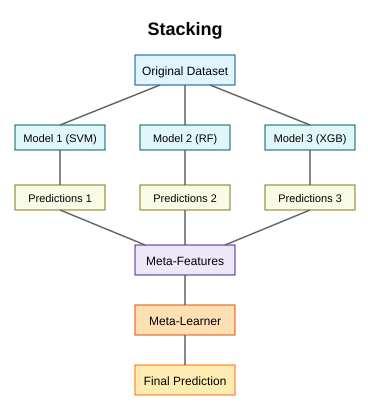

In [33]:
model_1=LogisticRegression(max_iter=1000)
model_2=RandomForestClassifier(n_estimators=100)
model_3=XGBClassifier(n_estimators=100, learning_rate=0.1)
model_4=MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam')
model_5=SVC(kernel='rbf', C=1.0,probability=True)

In [34]:
all_models = [model_1, model_2, model_3,model_4, model_5]

In [35]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19861 sha256=7107d85f364deae6fe2848d70581863ef11a399424a71de16a769d266aa0ede7
  Stored in directory: /root/.cache/pip/wheels/88/3e/4b/a1a6ef703727d7f457db98b2a0b29fd3bd599c210d04639756
Successfully built vecstack


In [36]:
from vecstack import stacking

In [37]:
s_train, s_test = stacking(all_models, X_train,y_train, X_test,
                          regression=False,
                          shuffle=True,
                          random_state=42,
                          verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


    fold  0:  [0.83058519]
    fold  1:  [0.83004634]
    fold  2:  [0.83565039]
    fold  3:  [0.83090850]
    ----
    MEAN:     [0.83179761] + [0.00224563]
    FULL:     [0.83179761]

model  1:     [RandomForestClassifier]
    fold  0:  [0.81851493]
    fold  1:  [0.81668283]
    fold  2:  [0.82077810]
    fold  3:  [0.81334195]
    ----
    MEAN:     [0.81732945] + [0.00272107]
    FULL:     [0.81732945]

model  2:     [XGBClassifier]
    fold  0:  [0.84179330]
    fold  1:  [0.83759026]
    fold  2:  [0.83629701]
    fold  3:  [0.83963789]
    ----
    MEAN:     [0.83882962] + [0.00208487]
    FULL:     [0.83882962]

model  3:     [MLPClassifier]
    fold  0:  [0.81603621]
    fold  1:  [0.82724432]
    fold  2:  [0.82756763]
    fold  3:  [0.81668283]
    ----
    MEAN:     [0.82188275] + [0.00552914]
    FULL:     [0.82188275]

model  4:     [SVC]
    fold  0:  [0.83521931]
    fold  1:  [0.83381830]
    fold  2:  [0.83705141]
    fold  3:  [0.83575816]
    ----
    MEAN:     [0

In [38]:
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(s_train, y_train)
meta_predictions = meta_model.predict(s_test)

In [39]:
print('Meta-model accuracy: {:.4f}'.format(accuracy_score(y_test, meta_predictions)))
print(classification_report(y_test, meta_predictions))

Meta-model accuracy: 0.8381
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7069
           1       0.72      0.52      0.60      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.73      0.75      9280
weighted avg       0.83      0.84      0.83      9280



In [40]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

xgb=XGBClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [41]:
meta_modellar=[xgb,rfc,gbc,abc]
giga_train, giga_test = stacking(meta_modellar, s_train,y_train, s_test,
                          regression=False,
                          shuffle=True,
                          random_state=42,
                          verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [XGBClassifier]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


    fold  0:  [0.84093113]
    fold  1:  [0.83511154]
    fold  2:  [0.83640478]
    fold  3:  [0.83726695]
    ----
    MEAN:     [0.83742860] + [0.00216280]
    FULL:     [0.83742860]

model  1:     [RandomForestClassifier]
    fold  0:  [0.84006897]
    fold  1:  [0.83511154]
    fold  2:  [0.83608147]
    fold  3:  [0.83726695]
    ----
    MEAN:     [0.83713223] + [0.00185943]
    FULL:     [0.83713223]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.84082336]
    fold  1:  [0.83629701]
    fold  2:  [0.83694364]
    fold  3:  [0.83586593]
    ----
    MEAN:     [0.83748249] + [0.00196662]
    FULL:     [0.83748249]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.83963789]
    fold  1:  [0.83575816]
    fold  2:  [0.83629701]
    fold  3:  [0.83263283]
    ----
    MEAN:     [0.83608147] + [0.00248457]
    FULL:     [0.83608147]



In [42]:
giga_model = LogisticRegression(max_iter=1000)
giga_model.fit(giga_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
giga_predictions = giga_model.predict(giga_test)
print('Meta-model accuracy: {:.4f}'.format(accuracy_score(y_test, meta_predictions)))
print(classification_report(y_test, meta_predictions))

Meta-model accuracy: 0.8381
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7069
           1       0.72      0.52      0.60      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.73      0.75      9280
weighted avg       0.83      0.84      0.83      9280



In [78]:
lr = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier(n_estimators=100)
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.1)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam')
svc = SVC(kernel='rbf', C=1.0, probability=True)

modellar = [
    ('LogisticRegression', lr),
    ('RandomForestClassifier', rfc),
    ('XGBClassifier', xgbc),
    ('MLPClassifier', mlp),
    ('SVC', svc)
]

from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=modellar,
    cv=4,
    final_estimator=LogisticRegression(max_iter=1000)
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(max_iter=1000)),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('MLPClassifier', MLPClassifier(max_iter=1000)),
                               ('SVC', SVC(probability=True))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [79]:
from sklearn.metrics import accuracy_score

y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8383


#Blending

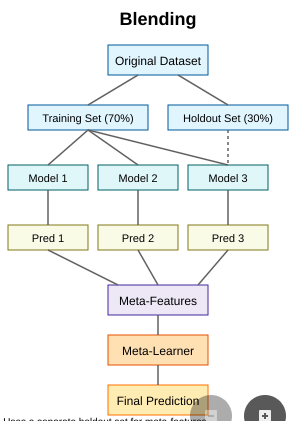

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
X_blend, X_val, y_blend, y_val = train_test_split(
    X_train, y_train, test_size=0.25)

In [59]:
models = [
    ('lr', LogisticRegression(max_iter=500, random_state=25)),
    ('dt', DecisionTreeClassifier(random_state=25)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
]

In [60]:
base_predictions = {}
for name,model in models:
    model.fit(X_blend, y_blend)
    base_predictions[name] = model.predict_proba(X_val)[:, 1]

In [61]:
base_predictions_df = pd.DataFrame(base_predictions)

In [62]:
base_predictions_df

,lr,dt,knn
0,0.638214,1.00,0.6
1,0.132770,0.00,0.0
2,0.100220,0.00,0.0
3,0.213365,0.00,0.0
4,0.015505,0.00,0.0
...,...,...,...
9274,0.443784,1.00,0.8
9275,0.600101,0.50,0.2
9276,0.257497,0.00,0.0
9277,0.134247,0.00,0.0


In [63]:
meta_model = RandomForestClassifier(random_state=25)
meta_model.fit(base_predictions_df, y_val)

RandomForestClassifier(random_state=25)

In [64]:
test_meta_features = {}
for name, model in models:
    test_meta_features[name] = model.predict_proba(X_test)[:, 1]

In [65]:
test_meta_df = pd.DataFrame(test_meta_features)

blend_preds = meta_model.predict(test_meta_df)

In [66]:
print(f'Blending: {accuracy_score(y_test, blend_preds):.4f}')
print("\nClassification Report for Blending:")
print(classification_report(y_test, blend_preds))

Blending: 0.7782

Classification Report for Blending:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7069
           1       0.53      0.55      0.54      2211

    accuracy                           0.78      9280
   macro avg       0.70      0.70      0.70      9280
weighted avg       0.78      0.78      0.78      9280



In [67]:
model_1.fit(X_blend, y_blend)
val_pred_1 = model_1.predict(X_val)
test_pred_1 = model_1.predict(X_test)

val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)

In [68]:
model_2.fit(X_blend, y_blend)
val_pred_2 = model_2.predict(X_val)
test_pred_2 = model_2.predict(X_test)

# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

In [69]:
model_3.fit(X_blend, y_blend)
val_pred_3 = model_3.predict(X_val)
test_pred_3 = model_3.predict(X_test)

# converting to dataframe
val_pred_3 = pd.DataFrame(val_pred_3)
test_pred_3 = pd.DataFrame(test_pred_3)

In [50]:
model_4.fit(X_blend, y_blend)
val_pred_4 = model_4.predict(X_val)
test_pred_4 = model_4.predict(X_test)

# converting to dataframe
val_pred_4 = pd.DataFrame(val_pred_4)
test_pred_4 = pd.DataFrame(test_pred_4)

In [51]:
model_5.fit(X_blend, y_blend)
val_pred_5 = model_5.predict(X_val)
test_pred_5 = model_5.predict(X_test)

# converting to dataframe
val_pred_5 = pd.DataFrame(val_pred_5)
test_pred_5 = pd.DataFrame(test_pred_5)

In [52]:
df_val = pd.concat([X_val, val_pred_1, val_pred_2, val_pred_3, val_pred_4, val_pred_5], axis=1)
df_test = pd.concat([X_test, test_pred_1, test_pred_2, test_pred_3, test_pred_4, test_pred_5], axis=1)

In [53]:
df_val.columns = df_val.columns.astype(str)
df_test.columns = df_test.columns.astype(str)

In [54]:
final_model = LogisticRegression(max_iter=1000)
df_val_cleaned = df_val.dropna()
y_val_cleaned = y_val[df_val_cleaned.index]
final_model.fit(df_val_cleaned, y_val_cleaned)

LogisticRegression(max_iter=1000)

In [55]:
df_test_cleaned = df_test.dropna()
y_test_cleaned = y_test[df_test_cleaned.index]
final_pred=final_model.predict(df_test_cleaned)

In [56]:
print(classification_report(y_test_cleaned, final_pred))
print(accuracy_score(y_test_cleaned, final_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1417
           1       0.66      0.54      0.59       466

    accuracy                           0.82      1883
   macro avg       0.76      0.72      0.74      1883
weighted avg       0.81      0.82      0.81      1883

0.8173127987254382


#Bagging

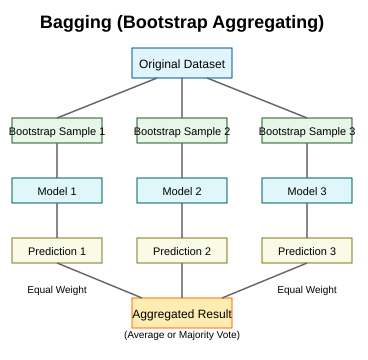

In [70]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=1,
        random_state=42
    )
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1,
                  random_state=42)

In [73]:
bagging_predictions = model.predict(X_test)

In [74]:
print("\nBagging Results:")
print(f"Accuracy: {accuracy_score(y_test, bagging_predictions):.4f}")
print(classification_report(y_test, bagging_predictions))


Bagging Results:
Accuracy: 0.7784
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7069
           1       0.53      0.55      0.54      2211

    accuracy                           0.78      9280
   macro avg       0.70      0.70      0.70      9280
weighted avg       0.78      0.78      0.78      9280



#Boosting

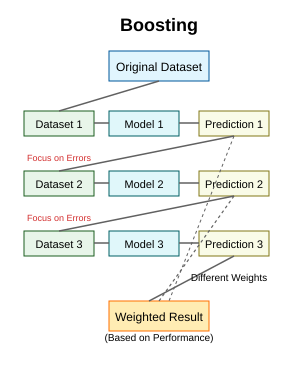

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [77]:
boosting_predictions = model.predict(X_test)

In [78]:
print("\GradientBoostingClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, boosting_predictions):.4f}")
print(classification_report(y_test, boosting_predictions))

\GradientBoostingClassifier Results:
Accuracy: 0.8395
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7069
           1       0.70      0.56      0.63      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.74      0.76      9280
weighted avg       0.83      0.84      0.83      9280



In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [80]:
y_pred_xgb = xgb.predict(X_test)

In [81]:
print(f'ACCURACY of XGB: {accuracy_score(y_test, y_pred_xgb):.4f}')
print("\nClassification Report for XGB")
print(classification_report(y_test, y_pred_xgb))

ACCURACY of XGB: 0.8359

Classification Report for XGB
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7069
           1       0.68      0.59      0.63      2211

    accuracy                           0.84      9280
   macro avg       0.78      0.75      0.76      9280
weighted avg       0.83      0.84      0.83      9280



In [82]:
!pip install LightGBM
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [83]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [84]:
lg_boost = LGBMClassifier(n_estimators=100, random_state=1)
cat_boost = CatBoostClassifier(n_estimators=100, random_state=1, verbose=0)
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=1)
hg_boost = HistGradientBoostingClassifier(max_iter=100, random_state=1)
gb_boost = GradientBoostingClassifier(n_estimators=100, random_state=1)

In [85]:
models = [('LGBM', lg_boost), ('Cat_b', cat_boost), ('ADA_B', ada_boost), ('HG_B',hg_boost), ('GB_B', gb_boost)]

In [93]:
predictions = {}
for name, model in models:
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, predictions[name])}')
    print(f'Classification Report: \n{classification_report(y_test, predictions[name])}')
    print('#'*53)

[LightGBM] [Info] Number of positive: 9137, number of negative: 27979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 37116, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246174 -> initscore=-1.119122
[LightGBM] [Info] Start training from score -1.119122
Model: LGBM
Accuracy: 0.8404094827586207
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7069
           1       0.70      0.59      0.64      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.75      0.77      9280
weighted avg       0.83      0.84      0.84      9280

####################################################

In [87]:
predictions_df = pd.DataFrame(predictions)
predictions_df

,LGBM,Cat_b,ADA_B,HG_B,GB_B
0,1,1,1,1,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
9275,0,0,0,0,0
9276,0,0,0,0,0
9277,0,0,0,0,0
9278,1,1,0,1,0


In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
stacking = StackingClassifier(estimators=models,
                              cv=4,
                              stack_method='predict_proba',
                              final_estimator=LogisticRegression(max_iter=500))
stacking.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 9137, number of negative: 27979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 37116, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246174 -> initscore=-1.119122
[LightGBM] [Info] Start training from score -1.119122
[LightGBM] [Info] Number of positive: 6853, number of negative: 20984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 27837, number of used features: 65
[LightGBM] [Info] [bin

StackingClassifier(cv=4,
                   estimators=[('LGBM', LGBMClassifier(random_state=1)),
                               ('Cat_b',
                                <catboost.core.CatBoostClassifier object at 0x7dccb75ae150>),
                               ('ADA_B',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=1)),
                               ('HG_B',
                                HistGradientBoostingClassifier(random_state=1)),
                               ('GB_B',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=LogisticRegression(max_iter=500),
                   stack_method='predict_proba')

In [91]:
y_pred_s_xgb = stacking.predict(X_test)

In [92]:
print(f'ACCURACY of XGB: {accuracy_score(y_test, y_pred_s_xgb):.4f}')
print("\nClassification Report for XGB")
print(classification_report(y_test, y_pred_s_xgb))

ACCURACY of XGB: 0.8388

Classification Report for XGB
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7069
           1       0.70      0.57      0.63      2211

    accuracy                           0.84      9280
   macro avg       0.79      0.75      0.76      9280
weighted avg       0.83      0.84      0.83      9280

